# Project: Walmart Sales Forecasting
**Phase I: Data Exploration and Pre-Processing**

@author: Syed Shahzad Raza

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-required-dependencies" data-toc-modified-id="Import-required-dependencies-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import required dependencies</a></span></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Data-Quality-Assessment-and-Pre-processing" data-toc-modified-id="Data-Quality-Assessment-and-Pre-processing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Quality Assessment and Pre-processing</a></span></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Exploration</a></span></li><li><span><a href="#Data-Visualization" data-toc-modified-id="Data-Visualization-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data Visualization</a></span></li><li><span><a href="#Create-Checkpoint-for-Phase-II" data-toc-modified-id="Create-Checkpoint-for-Phase-II-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Create Checkpoint for Phase II</a></span></li></ul></div>

## Import required dependencies

In [1]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.sql.functions import year, month, quarter, dayofmonth, dayofyear, weekofyear
from pyspark.sql.types import DoubleType

sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))
spark = SparkSession \
    .builder \
    .getOrCreate()

# import pixiedust for displaying dataframes and schemas
import pixiedust
pixiedust.optOut() # disable data sharing

# import matplotlib for data visualization
import matplotlib.pyplot as plt
%matplotlib inline

# import seaborn for data visualization
import seaborn as sns
sns.set()
sns.set_style('whitegrid')
sns.set_palette('colorblind')

# import pandas and numpy
import pandas as pd

Pixiedust database opened successfully


Pixiedust will not collect anonymous install statistics.


## Load Data

In [2]:
features = spark.read.format("csv").option("header", "true").option('inferSchema', 'true').load("features.csv")
stores = spark.read.format("csv").option("header", "true").option('inferSchema', 'true').load("stores.csv")
train = spark.read.format("csv").option("header", "true").option('inferSchema', 'true').load("train.csv")
test = spark.read.format("csv").option("header", "true").option('inferSchema', 'true').load("test.csv")

## Data Quality Assessment and Pre-processing

In [ ]:
display(features)

Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
1,2010-04-09 00:00:00,65.86,2.77,NA,NA,NA,NA,NA,210.6228574,7.808,False
1,2011-01-07 00:00:00,48.27,2.976,NA,NA,NA,NA,NA,211.4047419,7.742,False
1,2012-01-13 00:00:00,48.53,3.261,5183.29,8025.87,42.24,453.08,3719.38,219.8925263,7.348,False
1,2012-08-17 00:00:00,84.85,3.571,3662.06,137.86,4.84,2752.2,3446.15,222.0384109,6.908,False
1,2013-05-31 00:00:00,78.02,3.466,2369.77,142.45,475.35,45.55,2056.84,NA,NA,False
2,2011-07-01 00:00:00,85.69,3.524,NA,NA,NA,NA,NA,214.8368678,7.852,False
2,2011-11-25 00:00:00,56.36,3.236,919.71,62,77451.26,23,1589.43,218.1130269,7.441,True
2,2012-02-24 00:00:00,54.63,3.555,13048.36,12059.1,10.2,5299.73,10380.03,220.275944,7.057,False
2,2012-03-09 00:00:00,57.11,3.669,11784.91,368.32,3,2498.17,7746,220.6974332,7.057,False
3,2010-03-26 00:00:00,57.06,2.732,NA,NA,NA,NA,NA,214.3241011,7.368,False


In [ ]:
display(stores)

Store,Type,Size
1,A,151315
2,A,202307
3,B,37392
4,A,205863
5,B,34875
6,A,202505
7,B,70713
8,A,155078
9,B,125833
10,B,126512


In [5]:
display(train)

Store,Dept,Date,Weekly_Sales,IsHoliday
1,1,2010-07-23 00:00:00,15360.45,False
1,1,2010-10-08 00:00:00,23388.03,False
1,1,2011-05-20 00:00:00,15136.78,False
1,1,2011-09-02 00:00:00,15277.27,False
1,1,2011-10-14 00:00:00,23077.55,False
1,2,2012-04-27 00:00:00,45456.23,False
1,2,2012-06-22 00:00:00,46075.0,False
1,3,2012-09-21 00:00:00,13403.63,False
1,3,2012-10-12 00:00:00,10487.17,False
1,4,2010-07-16 00:00:00,35234.66,False


In [6]:
display(test)

Store,Dept,Date,IsHoliday
1,1,2012-11-23 00:00:00,True
1,2,2012-12-21 00:00:00,False
1,2,2013-05-31 00:00:00,False
1,3,2013-04-12 00:00:00,False
1,5,2013-02-08 00:00:00,True
1,6,2013-03-29 00:00:00,False
1,7,2013-05-24 00:00:00,False
1,8,2013-01-18 00:00:00,False
1,10,2013-04-26 00:00:00,False
1,11,2013-01-25 00:00:00,False


In [7]:
# Merge features, store and train data sets to create dataframe df
df = train.join(stores, on=['store'], how='left_outer')
df = df.join(features, on=['store', 'Date', 'IsHoliday'], how='left_outer')

In [8]:
# Merge features, store and test data sets to create dataframe test_df
test_df = test.join(stores, on=['store'], how='left_outer')
test_df = test_df.join(features, on=['store', 'Date', 'IsHoliday'], how='left_outer')

In [9]:
display(df)

Store,Date,IsHoliday,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
1,2010-05-14 00:00:00,False,1,18926.74,A,151315,74.78,2.854,NA,NA,NA,NA,NA,210.3374261,7.808
1,2010-06-25 00:00:00,False,1,16328.72,A,151315,84.34,2.653,NA,NA,NA,NA,NA,211.3386526,7.808
1,2011-02-18 00:00:00,False,1,46845.87,A,151315,57.36,3.045,NA,NA,NA,NA,NA,213.2478853,7.742
1,2012-02-10 00:00:00,True,1,36988.49,A,151315,48.02,3.409,13925.06,6927.23,101.64,8471.88,6886.04,220.2651783,7.348
1,2012-09-28 00:00:00,False,2,45784.76,A,151315,76.08,3.666,3666.27,7.64,1.65,1417.96,4744.28,222.9816579,6.908
1,2010-09-24 00:00:00,False,3,8097.92,A,151315,80.94,2.624,NA,NA,NA,NA,NA,211.5972246,7.787
1,2011-04-29 00:00:00,False,3,8653.62,A,151315,72.03,3.81,NA,NA,NA,NA,NA,215.6279544,7.682
1,2011-07-01 00:00:00,False,3,8070.64,A,151315,85.55,3.524,NA,NA,NA,NA,NA,215.1841368,7.962
1,2012-04-13 00:00:00,False,3,7927.73,A,151315,69.07,3.891,6186.19,3288.69,17.07,1822.55,1063.78,221.5102105,7.143
1,2012-06-08 00:00:00,False,3,8614.64,A,151315,78.3,3.452,8813.81,116.8,64.55,2652.04,7161.91,221.7494839,7.143


In [10]:
display(test_df)

Store,Date,IsHoliday,Dept,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
1,2012-12-14 00:00:00,False,2,A,151315,48.89,3.168,3504.83,NA,73.26,1636.8,2779.6,223.7192767,6.573
1,2013-03-08 00:00:00,False,3,A,151315,50.81,3.658,5000.58,290.46,78.77,606.15,3697.11,224.7087632,6.525
1,2013-05-24 00:00:00,False,4,A,151315,77.19,3.494,7959.89,178,1621.47,3152.57,2938.7,NA,NA
1,2013-06-14 00:00:00,False,6,A,151315,79.86,3.431,12592.32,527.48,402.88,7474.56,2484.44,NA,NA
1,2013-01-25 00:00:00,False,8,A,151315,53.37,3.227,965.89,1097.91,0.1,225.36,1831.88,224.2355518,6.525
1,2013-04-12 00:00:00,False,10,A,151315,62.72,3.529,3672.43,932.58,52.86,949.07,2836.64,225.1701596,6.314
1,2013-03-29 00:00:00,False,11,A,151315,51.0,3.606,13067.46,NA,384.9,122.93,3903.8,225.0029202,6.525
1,2012-11-09 00:00:00,False,12,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.4813073,6.573
1,2013-02-22 00:00:00,False,14,A,151315,50.25,3.597,20107.75,3163.89,42.2,15657.3,5812.86,224.4202895,6.525
1,2013-06-21 00:00:00,False,14,A,151315,81.35,3.479,8104.02,417.99,327.33,5182.25,3754.44,NA,NA


In [11]:
# Change schema of variables

df = df.withColumn("CPI", df["CPI"].cast(DoubleType()))
df = df.withColumn("Unemployment", df["Unemployment"].cast(DoubleType()))
df = df.withColumn("MarkDown1", df["MarkDown1"].cast(DoubleType()))
df = df.withColumn("MarkDown2", df["MarkDown2"].cast(DoubleType()))
df = df.withColumn("MarkDown3", df["MarkDown3"].cast(DoubleType()))
df = df.withColumn("MarkDown4", df["MarkDown4"].cast(DoubleType()))
df = df.withColumn("MarkDown5", df["MarkDown5"].cast(DoubleType()))

test_df = test_df.withColumn("CPI", test_df["CPI"].cast(DoubleType()))
test_df = test_df.withColumn("Unemployment", test_df["Unemployment"].cast(DoubleType()))
test_df = test_df.withColumn("MarkDown1", test_df["MarkDown1"].cast(DoubleType()))
test_df = test_df.withColumn("MarkDown2", test_df["MarkDown2"].cast(DoubleType()))
test_df = test_df.withColumn("MarkDown3", test_df["MarkDown3"].cast(DoubleType()))
test_df = test_df.withColumn("MarkDown4", test_df["MarkDown4"].cast(DoubleType()))
test_df = test_df.withColumn("MarkDown5", test_df["MarkDown5"].cast(DoubleType()))

In [12]:
# Add new variables (features) - Year, Quarter, Month, Week, Day_of_month and Day_of_year

df = df.withColumn('Year',year(df.Date))
df = df.withColumn('Quarter',quarter(df.Date))
df = df.withColumn('Month',month(df.Date))
df = df.withColumn('Week',weekofyear(df.Date))
df = df.withColumn('Day_of_month',dayofmonth(df.Date))
df = df.withColumn('Day_of_year',dayofyear(df.Date))

test_df = test_df.withColumn('Year',year(test_df.Date))
test_df = test_df.withColumn('Quarter',quarter(test_df.Date))
test_df = test_df.withColumn('Month',month(test_df.Date))
test_df = test_df.withColumn('Week',weekofyear(test_df.Date))
test_df = test_df.withColumn('Day_of_month',dayofmonth(test_df.Date))
test_df = test_df.withColumn('Day_of_year',dayofyear(test_df.Date))

## Data Exploration

In [13]:
# Check how many years data set contains
df.select('Year').orderBy('Year').distinct().show(df.count(), false)

+----+
|Year|
+----+
|2010|
|2011|
|2012|
+----+



<p style="background:black;color:white">
Data set covers three years: 2010, 2011 and 2012
</p>

In [14]:
# Check how many stores data set contains
df.select('Store').orderBy('Store').distinct().show(df.count(), false)

+-----+
|Store|
+-----+
|1    |
|2    |
|3    |
|4    |
|5    |
|6    |
|7    |
|8    |
|9    |
|10   |
|11   |
|12   |
|13   |
|14   |
|15   |
|16   |
|17   |
|18   |
|19   |
|20   |
|21   |
|22   |
|23   |
|24   |
|25   |
|26   |
|27   |
|28   |
|29   |
|30   |
|31   |
|32   |
|33   |
|34   |
|35   |
|36   |
|37   |
|38   |
|39   |
|40   |
|41   |
|42   |
|43   |
|44   |
|45   |
+-----+



<p style="background:black;color:white">
Data is available for 45 Walmart Stores
</p>

In [15]:
# Check how many types of stores are in the data set
df.select('Type').orderBy('Type').distinct().show(df.count(), false)

+----+
|Type|
+----+
|A   |
|B   |
|C   |
+----+



<p style="background:black;color:white">
There are only three types of stores: A, B and C
</p>

In [16]:
# Check how many departments are in the data set
df.select('Dept').orderBy('Dept').distinct().show(df.count(), false)

+----+
|Dept|
+----+
|1   |
|2   |
|3   |
|4   |
|5   |
|6   |
|7   |
|8   |
|9   |
|10  |
|11  |
|12  |
|13  |
|14  |
|16  |
|17  |
|18  |
|19  |
|20  |
|21  |
|22  |
|23  |
|24  |
|25  |
|26  |
|27  |
|28  |
|29  |
|30  |
|31  |
|32  |
|33  |
|34  |
|35  |
|36  |
|37  |
|38  |
|39  |
|40  |
|41  |
|42  |
|43  |
|44  |
|45  |
|46  |
|47  |
|48  |
|49  |
|50  |
|51  |
|52  |
|54  |
|55  |
|56  |
|58  |
|59  |
|60  |
|65  |
|67  |
|71  |
|72  |
|74  |
|77  |
|78  |
|79  |
|80  |
|81  |
|82  |
|83  |
|85  |
|87  |
|90  |
|91  |
|92  |
|93  |
|94  |
|95  |
|96  |
|97  |
|98  |
|99  |
+----+



<p style="background:black;color:white">
There are 99 departments altogether
</p>

In [17]:
# Convert stores data set (Spark data frame) to Pandas data frame for visualization
stores_pd = stores.toPandas()

Text(0, 0.5, 'Number of Stores')

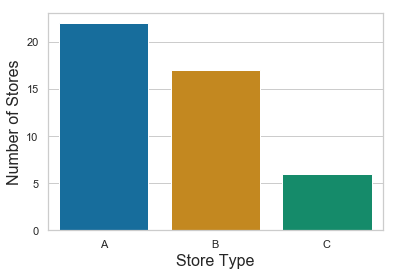

In [18]:
# Check the number of stores for each store type
sns.barplot(stores_pd['Type'].unique(), stores_pd['Size'].groupby(stores_pd['Type']).count())
plt.xlabel('Store Type', fontsize=16)
plt.ylabel('Number of Stores', fontsize=16)

<p style="background:black;color:white">
It can be seen that there are more stores of type A compared to type B and then C.
</p>

Text(0, 0.5, 'Store Size')

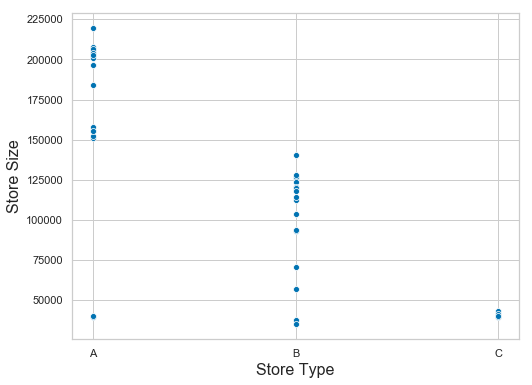

In [19]:
# Check store sizes for each store type
plt.figure(figsize=(8,6))
sns.scatterplot(stores_pd['Type'], stores_pd['Size'])
plt.xlabel('Store Type', fontsize=16)
plt.ylabel('Store Size', fontsize=16)

<p style="background:black;color:white">
Type A stores are of largest size compared to Type B and then Type C. There is one outlier in terms of Type A stores, which is of smaller size compared to the rest.
</p>

Text(0, 0.5, 'Store Size')

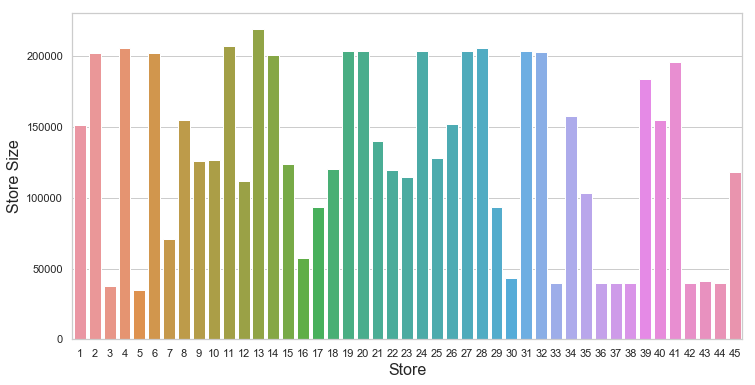

In [20]:
# Check store size of each store
plt.figure(figsize=(12,6))
sns.barplot(stores_pd['Store'], stores_pd['Size'])
plt.xlabel('Store', fontsize=16)
plt.ylabel('Store Size', fontsize=16)

In [21]:
# Convert df data set (Spark data frame) to Pandas data frame for visualization
df_pd = df.toPandas()

In [22]:
# Convert test_df data set (Spark data frame) to Pandas data frame for visualization
test_df_pd = test_df.toPandas()

<p style="background:black;color:white">
Note: For better performance, it is suggested to take a sample of original data set while converting to Pandas Data Frame for visualization
</p>

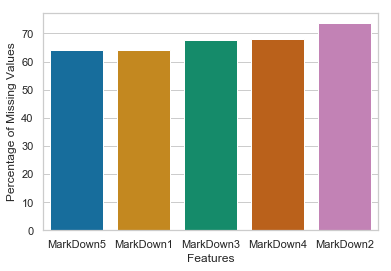

In [23]:
# Percentage of missing values in training data set
missing_values = df_pd.isnull().sum() / len(df_pd) * 100
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)

missing_values = missing_values.to_frame()
missing_values.columns = ['count']
missing_values.index.names = ['Name']
missing_values['Name'] = missing_values.index

ax = sns.barplot(x = 'Name', y = 'count', data = missing_values)
ax.set(xlabel = 'Features', ylabel = 'Percentage of Missing Values')
plt.show()

<p style="background:black;color:white">
All features MarkDown* have more than 60% missing values
</p>

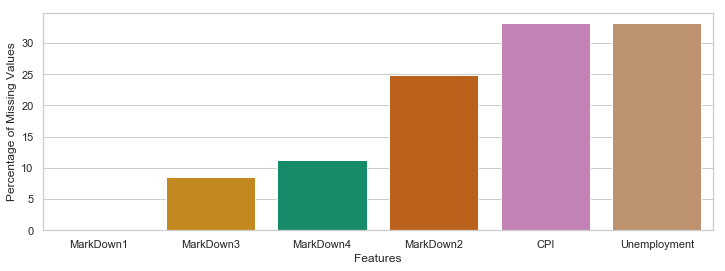

In [24]:
# Percentage of missing values in test data set
missing_values = test_df_pd.isnull().sum() / len(test_df_pd) * 100
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)

missing_values = missing_values.to_frame()
missing_values.columns = ['count']
missing_values.index.names = ['Name']
missing_values['Name'] = missing_values.index

f, ax = plt.subplots(figsize=(12, 4))
ax = sns.barplot(x = 'Name', y = 'count', data = missing_values)
ax.set(xlabel = 'Features', ylabel = 'Percentage of Missing Values')
plt.show()

<p style="background:black;color:white">
MarkDown1, MarkDown2, MarkDown3, MarkDown4, CPI and Unemployment have missing values
</p>

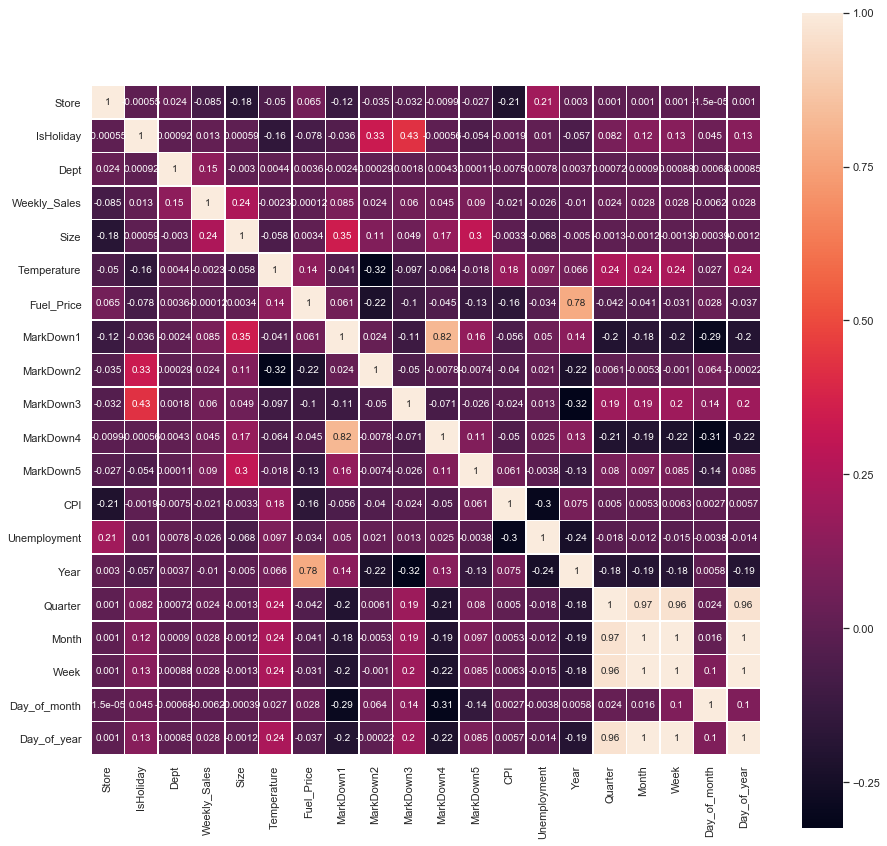

In [25]:
# Plot Correlation Matrix to identify relationship between variables (features)
corrmat = df_pd.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corrmat, square=True, annot=True, linewidths=.5);

<p style="background:black;color:white">
Year and Fuel_Price are correlated
<br>
MarkDown4 and MarkDown1 are correlated
<br>
<br>
* we will return to correlation matrix during feature engineering to decide whether to drop or keep the features.
</p>

## Data Visualization

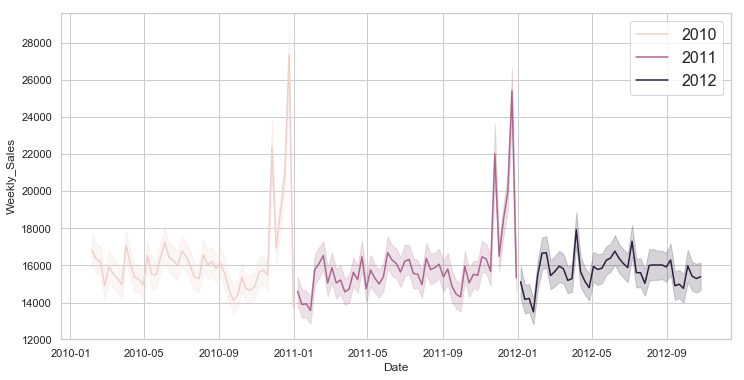

In [26]:
# Line plot showing weekly sales in 2010, 2011 and 2012
plt.figure(figsize=(12,6))
sns.lineplot(x = "Date", y = "Weekly_Sales", hue = "Year", data = df_pd)
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=16)

<p style="background:black;color:white">
Peaks are appearing at the end of year, hinting increased sales due to holiday season.
</p>

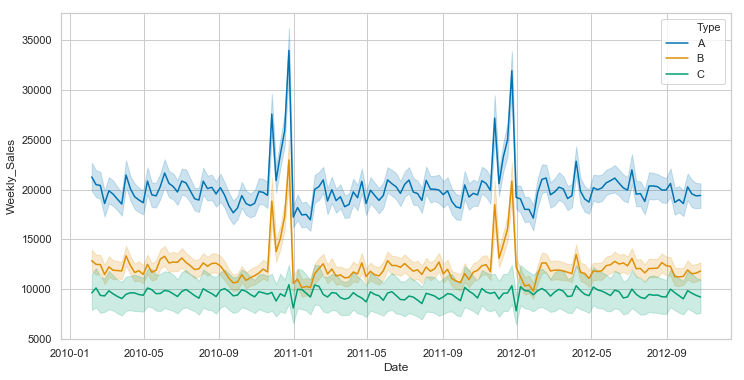

In [27]:
# Visualizing trend of weekly sales by store type
plt.figure(figsize=(12,6))
sns.lineplot(x = "Date", y = "Weekly_Sales", hue = "Type", data = df_pd)

<p style="background:black;color:white">
It may be the case that weekly sales are greatest for Type A stores because Type A stores are bigger in size and more in number.
</p>

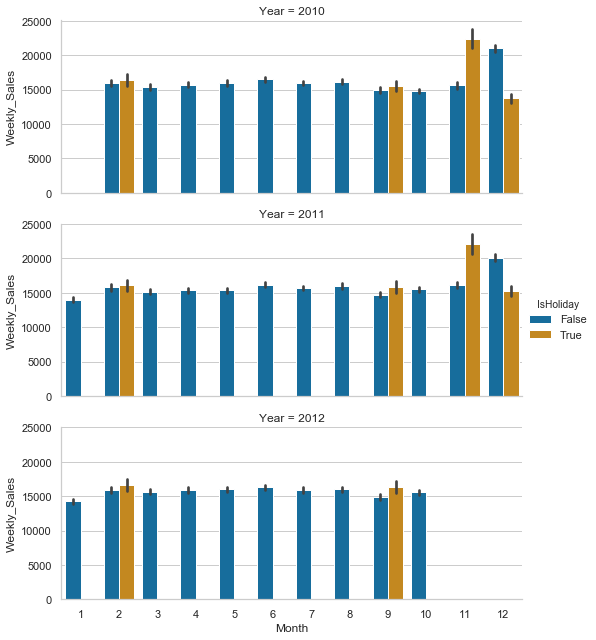

In [28]:
# Comparison of weekly sales per month based on holiday
g = sns.catplot(x="Month", y="Weekly_Sales",
                hue="IsHoliday", row="Year",
                data=df_pd, kind="bar",
                height=3, aspect=2.5);

<p style="background:black;color:white">
It can be seen that holidays are observed in February, September, November and December.
<br>
We do not have data for November and December of 2012
<br>
Highest weekly sales were recorded in November 2011 during holiday
</p>

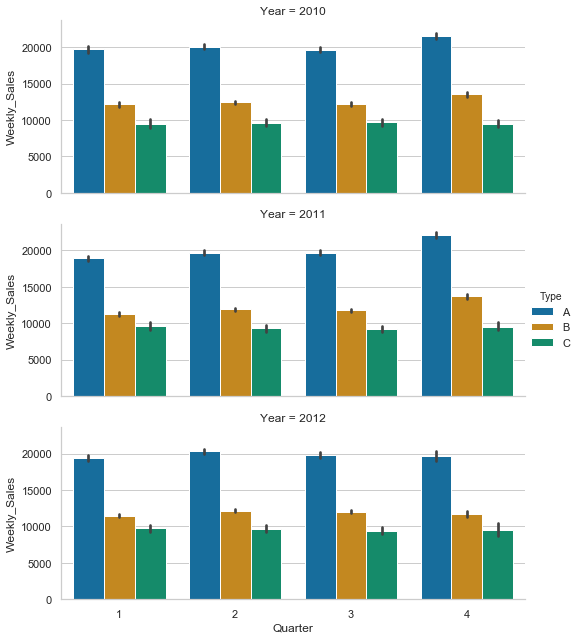

In [29]:
# Weekly sales per quarter by store type
g = sns.catplot(x="Quarter", y="Weekly_Sales",
                hue="Type", row="Year",
                data=df_pd, kind="bar",
                height=3, aspect=2.5);

<p style="background:black;color:white">
It seems like weekly sales are greatest for Type A stores because Type A stores are bigger in size and more in number.
</p>

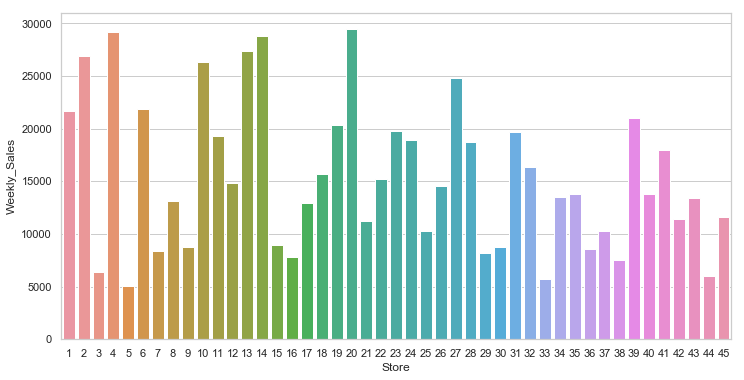

In [30]:
# Weekly sales per store
plt.figure(figsize=(12,6))
sns.barplot(x = "Store", y = "Weekly_Sales", ci=None, data = df_pd)

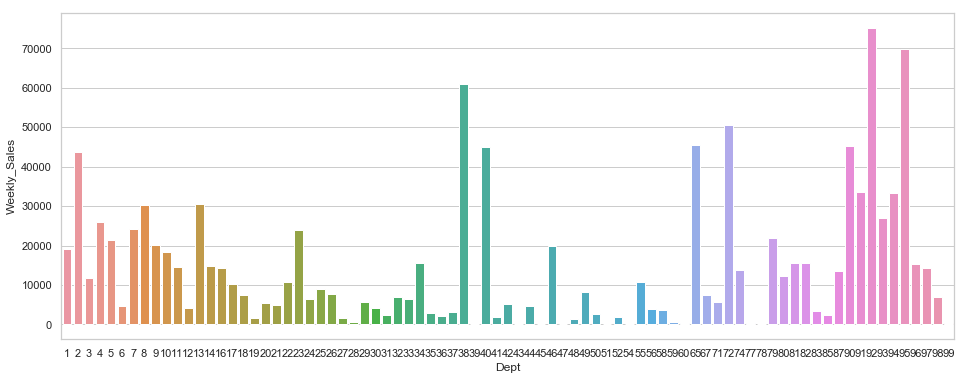

In [31]:
# Weekly sales per department
plt.figure(figsize=(16,6))
sns.barplot(x = "Dept", y = "Weekly_Sales", ci=None, data = df_pd)

<p style="background:black;color:white">
Since departments are numbered, we are unable to specifically conclude which department (for example grocery, produce, garden, auto or garments) have high weekly sales compared to others. 
<br>
We can only conclude that departments 38, 40, 92 and 95 have high weekly sales compared to the rest.
<br>
Low or no sales occure in department 43, 45, 47, 51, 54, 60, 77 and 78.
</p>

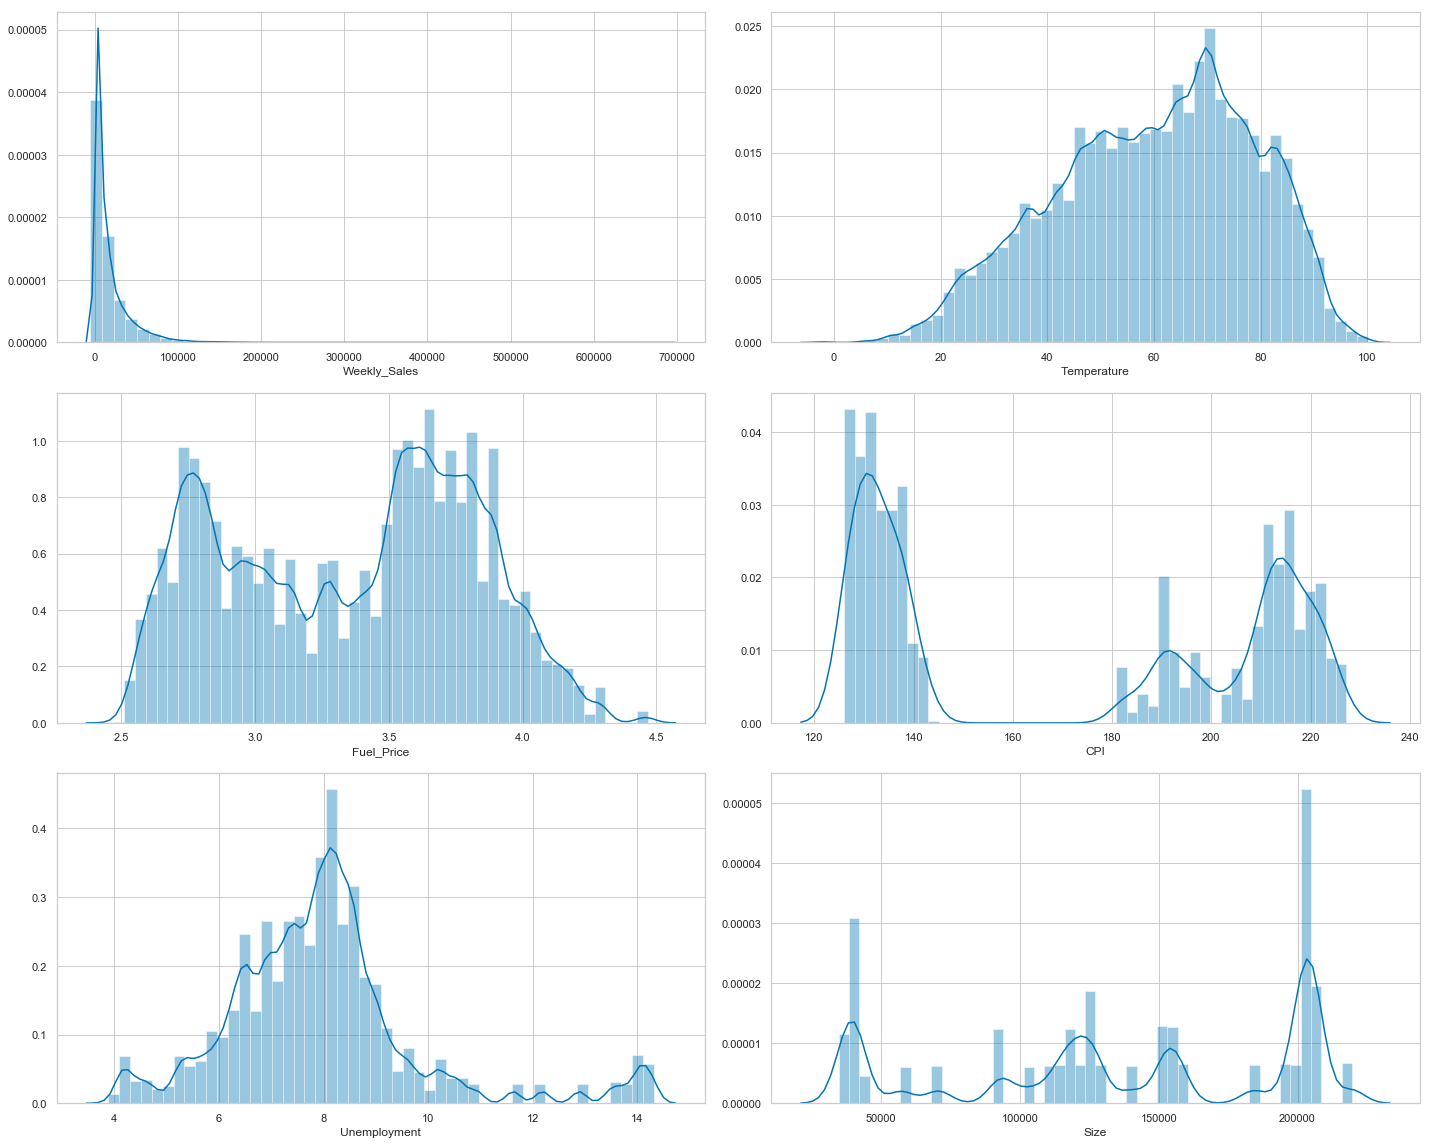

In [32]:
# Distribution of Weekly_Sales, Temperature, Fuel_Price, CPI, Unemployment and Size
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(20,16))
sns.distplot(df_pd['Weekly_Sales'], ax=ax1)
sns.distplot(df_pd['Temperature'], ax=ax2)
sns.distplot(df_pd['Fuel_Price'], ax=ax3)
sns.distplot(df_pd['CPI'], ax=ax4)
sns.distplot(df_pd['Unemployment'], ax=ax5)
sns.distplot(df_pd['Size'], ax=ax6)
plt.tight_layout()

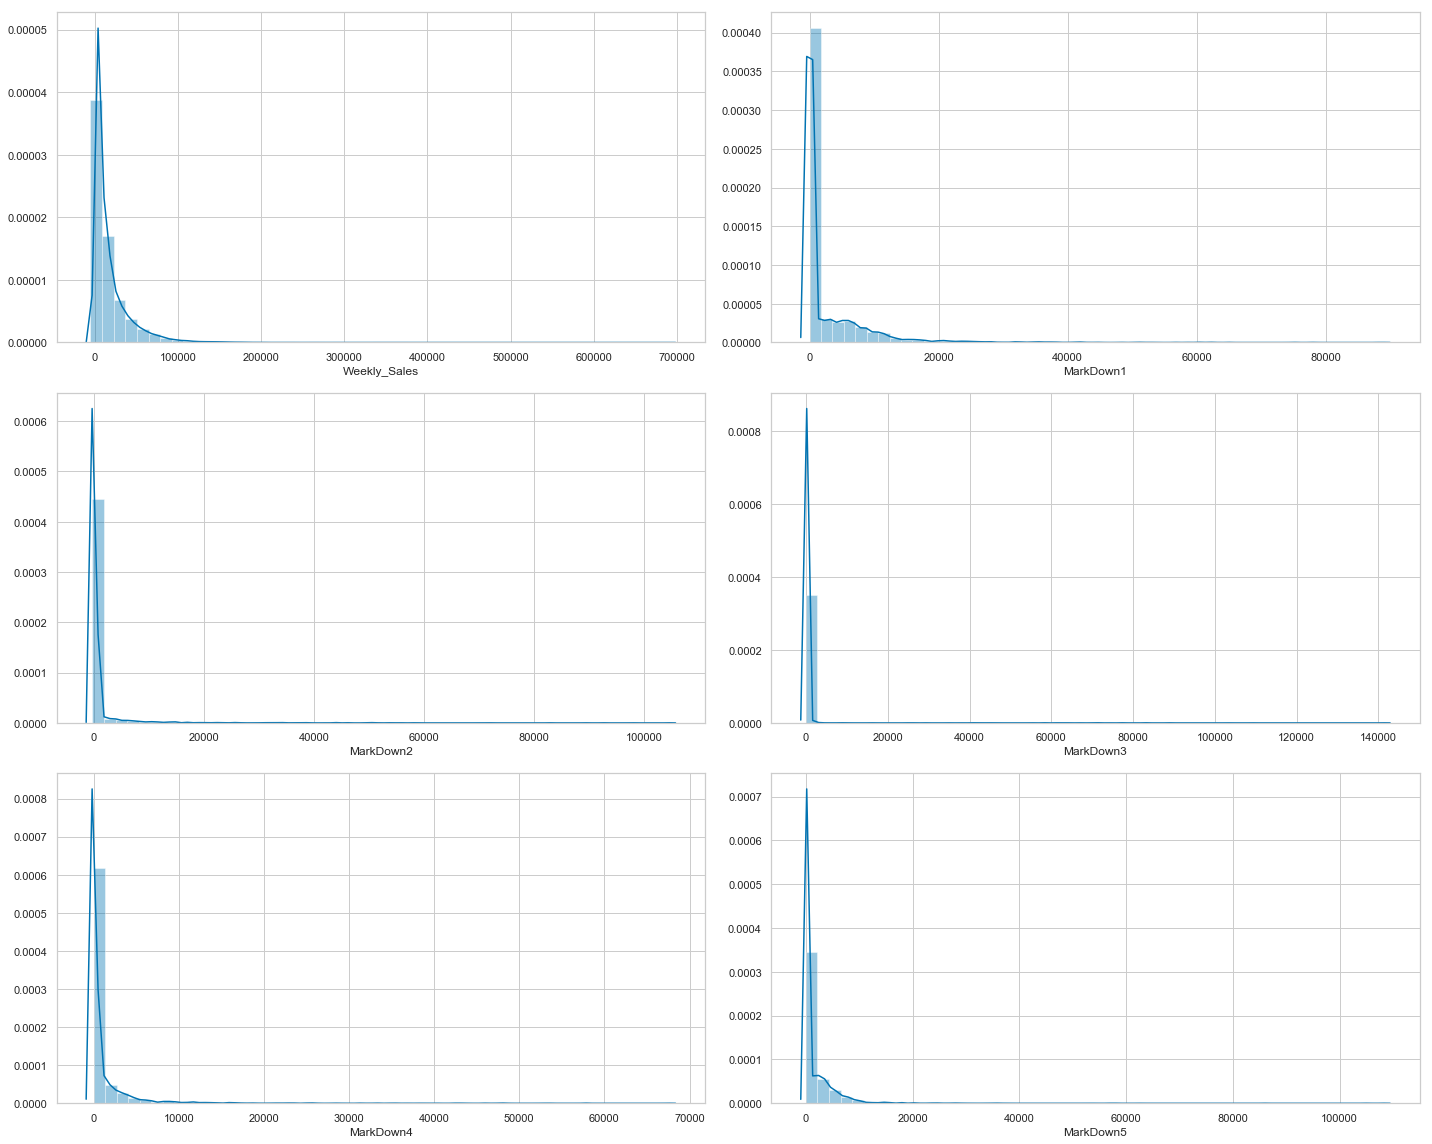

In [33]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(20,16))
sns.distplot(df_pd['Weekly_Sales'], ax=ax1)
sns.distplot(df_pd['MarkDown1'].fillna(0), ax=ax2)
sns.distplot(df_pd['MarkDown2'].fillna(0), ax=ax3)
sns.distplot(df_pd['MarkDown3'].fillna(0), ax=ax4)
sns.distplot(df_pd['MarkDown4'].fillna(0), ax=ax5)
sns.distplot(df_pd['MarkDown5'].fillna(0), ax=ax6)
plt.tight_layout()

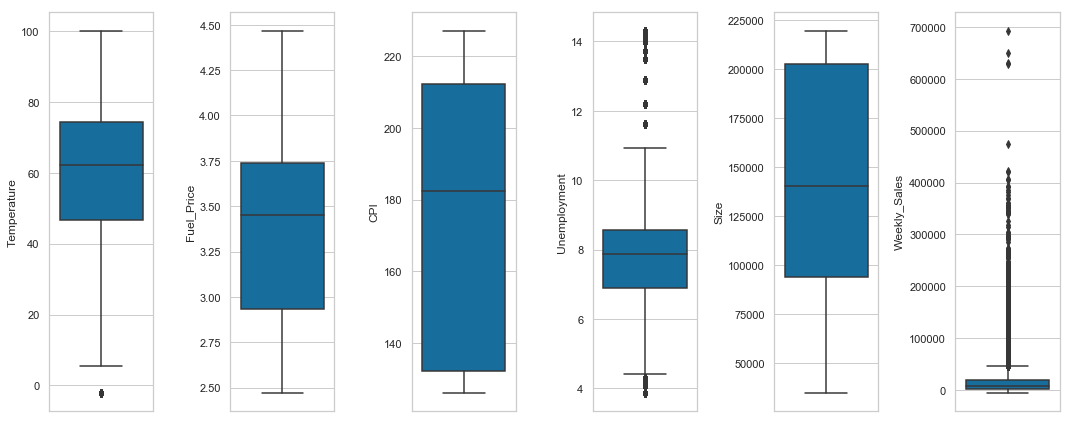

In [34]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(15,6))
sns.boxplot(df_pd['Temperature'], ax=ax1, orient='v')
sns.boxplot(df_pd['Fuel_Price'], ax=ax2, orient='v')
sns.boxplot(df_pd['CPI'], ax=ax3, orient='v')
sns.boxplot(df_pd['Unemployment'], ax=ax4, orient='v')
sns.boxplot(df_pd['Size'], ax=ax5, orient='v')
sns.boxplot(df_pd['Weekly_Sales'], ax=ax6, orient='v')
plt.tight_layout()

<p style="background:black;color:white">
Through these distribution plots and box plots, we can see that these features have different scales. Some of them also have some skewness. So, we may need a further transformation which minimizes theses effects.
</p>

In [35]:
# Check correlation between numerical features and Weekly Sales

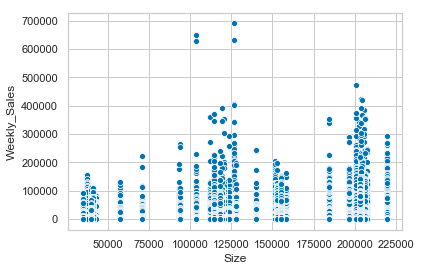

In [36]:
sns.scatterplot(x = 'Size', y = 'Weekly_Sales', data = df_pd)

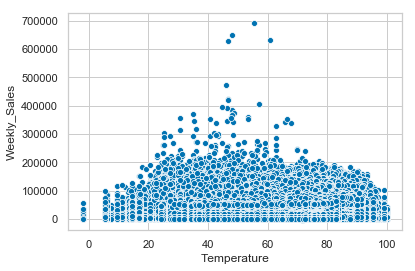

In [37]:
sns.scatterplot(x = 'Temperature', y = 'Weekly_Sales', data = df_pd)

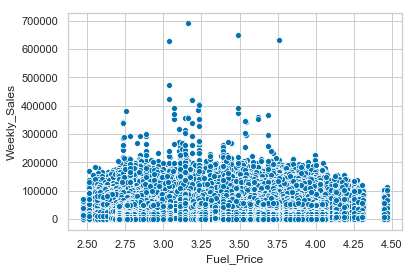

In [38]:
sns.scatterplot(x = 'Fuel_Price', y = 'Weekly_Sales', data = df_pd)

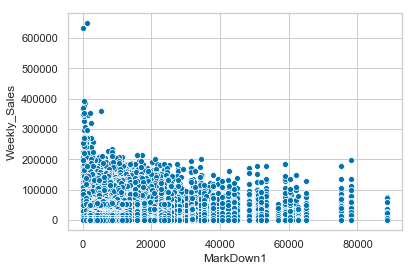

In [39]:
sns.scatterplot(x = 'MarkDown1', y = 'Weekly_Sales', data = df_pd)

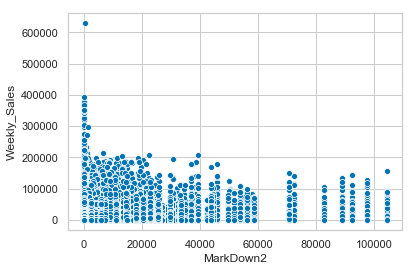

In [40]:
sns.scatterplot(x = 'MarkDown2', y = 'Weekly_Sales', data = df_pd)

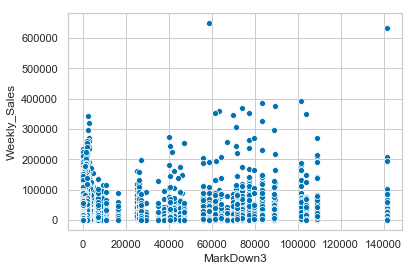

In [41]:
sns.scatterplot(x = 'MarkDown3', y = 'Weekly_Sales', data = df_pd)

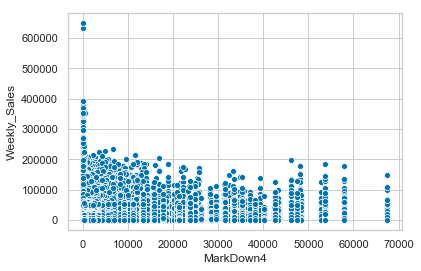

In [42]:
sns.scatterplot(x = 'MarkDown4', y = 'Weekly_Sales', data = df_pd)

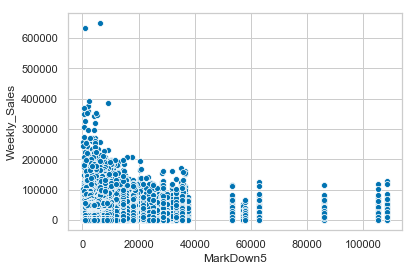

In [43]:
sns.scatterplot(x = 'MarkDown5', y = 'Weekly_Sales', data = df_pd)

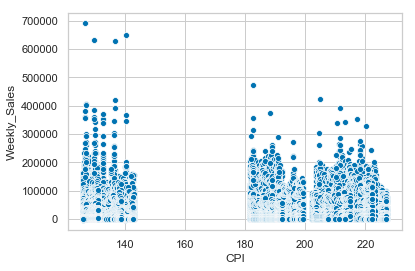

In [44]:
sns.scatterplot(x = 'CPI', y = 'Weekly_Sales', data = df_pd)

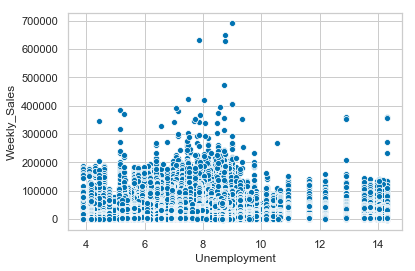

In [45]:
sns.scatterplot(x = 'Unemployment', y = 'Weekly_Sales', data = df_pd)

<p style="background:black;color:white">
Above plots show that there is a low correlation between numerical features and Weekly Sales. 
<br>    
<br>    
It is also seen that most of the feature values result in Weekly Sales less than 300000 dollars.
</p>

## Create Checkpoint for Phase II

In [46]:
# Save data for Phase II
df_pd.to_csv('phase_1_train_df.csv', index=False)
test_df_pd.to_csv('phase_1_test_df.csv', index=False)